In [454]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [455]:
n_task_per_file = 20
n_files = 10
base_dir = "noise_sd=1/vary_r_noisesd_1.0_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [456]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [457]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,UV(0.1)
0,1.00,0.50,1.00,0.75,1.00,1.00,0.75,1.00,0.5
1,1.00,0.75,0.50,1.00,0.75,1.00,1.00,1.00,0.5
2,0.50,0.75,0.50,0.75,1.00,1.00,1.00,1.00,1.0
3,0.75,0.75,0.50,1.00,1.00,0.25,1.00,1.00,1.0
4,1.00,0.75,0.75,1.00,0.25,1.00,0.75,0.75,1.0
...,...,...,...,...,...,...,...,...,...
15,1.00,1.00,1.00,0.75,1.00,1.00,0.50,0.50,0.5
16,1.00,0.50,0.75,1.00,0.75,1.00,1.00,1.00,1.0
17,1.00,0.50,1.00,1.00,0.75,1.00,0.75,0.75,0.5
18,0.75,0.75,1.00,1.00,0.75,1.00,0.75,1.00,0.5


In [458]:
length_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,UV(0.1)
0,7.720549,7.652838,6.497577,6.533050,6.863096,5.836348,5.499861,4.989837,4.366911
1,8.913421,7.450907,6.346333,5.048633,5.820972,6.991359,5.412261,5.416575,4.388107
2,10.260955,8.362195,7.440253,7.348013,6.918915,6.906641,6.255488,5.995231,4.406986
3,10.511731,7.693753,7.917425,7.533107,7.214688,6.672753,5.474039,5.998548,4.374813
4,8.217174,6.372518,7.204251,6.583454,6.096573,5.636655,5.586387,4.990115,4.366911
...,...,...,...,...,...,...,...,...,...
15,8.098420,6.427190,6.217751,6.190884,5.160273,4.853361,4.344353,4.196459,4.364290
16,7.342973,7.110084,6.573306,6.177400,5.989737,5.319819,5.342236,5.512532,4.364290
17,8.627230,6.687556,6.094195,6.110432,5.885040,5.466926,5.467591,4.934049,4.388107
18,11.399483,8.191374,8.540872,7.586140,7.106969,6.720259,7.156483,6.931576,4.388107


In [459]:
MSE_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,UV(0.1)
0,5.739350,4.963828,5.555206,5.396922,6.015460,5.001439,6.339369,5.091899,5.262764
1,6.121263,6.536833,5.963658,5.953698,5.138428,5.865301,6.117072,5.738838,5.438107
2,5.546129,5.915020,5.645156,5.915020,6.470379,5.252453,5.102670,5.990036,4.426664
3,6.837124,7.174377,6.676831,8.203949,7.378859,7.802000,5.372891,7.126031,5.208146
4,5.501549,6.646405,6.087906,6.667982,6.771704,7.112183,5.535210,6.135680,7.206505
...,...,...,...,...,...,...,...,...,...
15,4.680571,4.035585,5.362089,5.004286,3.827825,4.536412,3.956542,3.857727,4.560238
16,4.783986,4.841425,4.927455,4.966378,5.384872,4.847351,4.935800,4.889200,5.028321
17,6.232857,6.342867,6.530590,6.840018,6.630204,6.235477,6.552549,6.474093,6.162432
18,5.335198,5.753611,6.123974,6.435107,6.371190,5.778859,6.236339,6.882526,4.625587


In [460]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,20)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1        0.840000
0.2        0.840000
0.3        0.828333
0.4        0.841250
0.5        0.837500
0.6        0.886667
0.7        0.858750
0.8        0.791250
UV(0.1)    0.902500
dtype: float64
Length :
 0.1        9.175271
0.2        7.714145
0.3        7.183209
0.4        6.693075
0.5        6.442408
0.6        6.053271
0.7        5.680817
0.8        5.336955
UV(0.1)    4.384037
dtype: float64
MSE :
 0.1        5.567196
0.2        5.603473
0.3        5.634324
0.4        5.646938
0.5        5.600206
0.6        5.528339
0.7        5.604511
0.8        5.671417
UV(0.1)    5.513183
dtype: float64


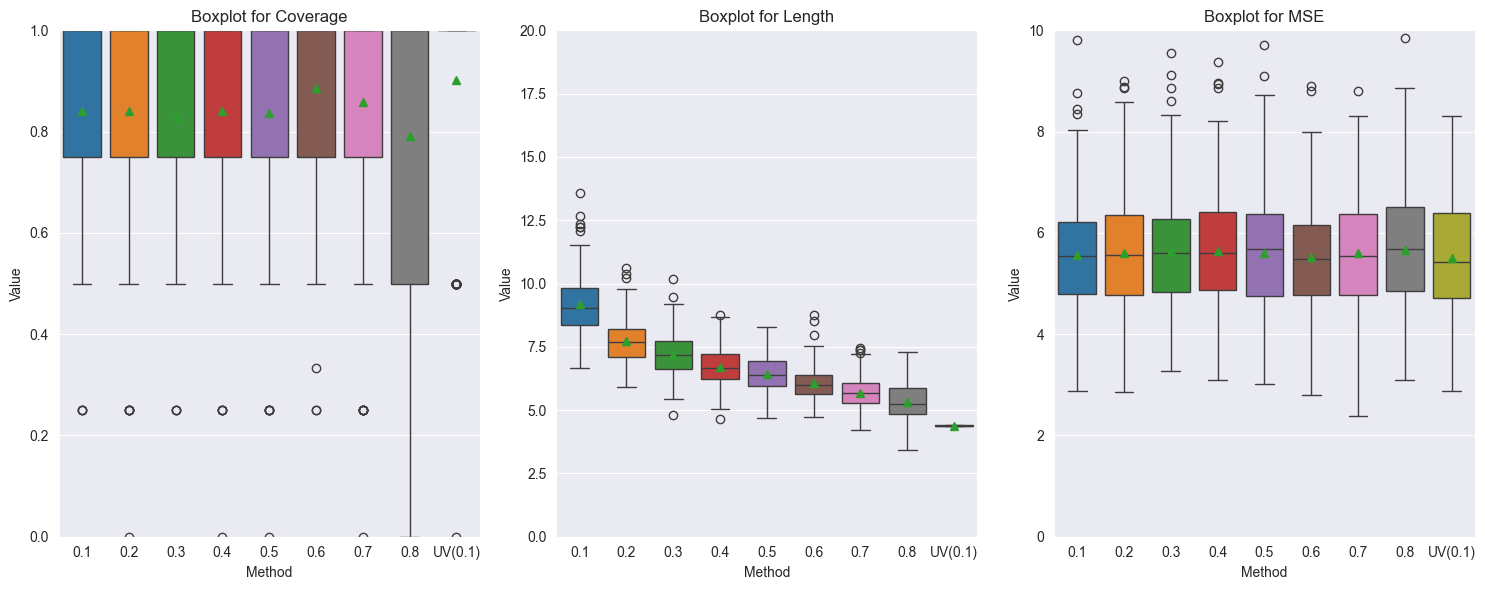

In [461]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [155]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.714286,1.000000,1.000000,1.000000,1.000000,0.833333
1,0.833333,0.833333,0.833333,1.000000,1.000000,0.500000
2,0.500000,0.833333,1.000000,0.333333,0.833333,0.833333
3,0.833333,1.000000,0.857143,0.500000,0.833333,1.000000
4,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
4,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
5,0.833333,1.000000,1.000000,0.857143,0.600000,0.833333
6,1.000000,1.000000,1.000000,0.800000,0.833333,1.000000
7,1.000000,1.000000,1.000000,0.166667,1.000000,0.800000


In [397]:
a = np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3), size=10)

In [403]:
a

array([[ 1.06793651,  1.36987016,  0.38254673],
       [-0.00676015,  0.04964653,  0.54545289],
       [ 0.36283111,  1.14141412, -0.09072415],
       [-0.35752269,  0.12027834,  1.73155615],
       [-0.2604219 , -0.41158687,  0.85320342],
       [-0.06342349,  0.26980504,  0.54805346],
       [ 3.11418919, -0.40739602,  0.14077256],
       [-1.10491165,  0.58322557, -0.02100113],
       [ 1.94883554,  0.87846771, -0.46144371],
       [-1.41438826,  0.90600893,  1.3235796 ]])

In [406]:
a.max(axis=1) < 1

array([False,  True, False, False,  True,  True, False,  True, False,
       False])

In [410]:
a.min(axis=1) > -1

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

In [413]:
np.logical_and(a.min(axis=1) > -1, a.max(axis=1) < 1).sum()

np.int64(3)